<a href="https://colab.research.google.com/github/IrinaAristova/Aristova_BFGS/blob/main/%D0%90%D1%80%D1%96%D1%81%D1%82%D0%BE%D0%B2%D0%B0_%D0%86_%D0%9A%D0%9C_82_BFGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

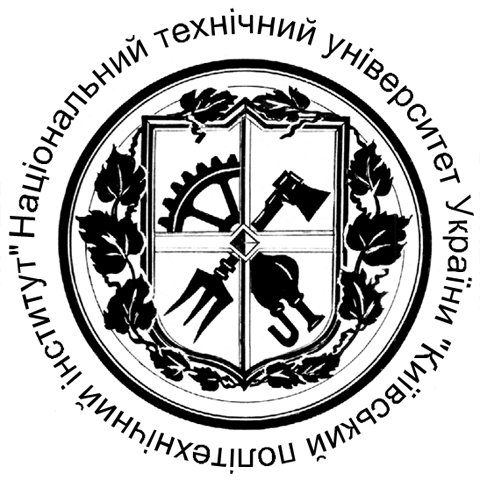

# Арістова Ірина, КМ-82

# Метод Бройдена-Флетчера-Гольдфарба-Шанно (BFGS)

## Зміст

Постановка задачі

Теоретичні відомості

- Методи змінної метрики
- Метод Метод Бройдена-Флетчера-Гольдфарба-Шанно
- Функція Розенброка
- Критерії закінчення
- Методи штрафних функцій

Реалізація методу

- Безумовна оптимізація

- - Імпорт бібліотек

- - Оголошення констант

- - Оголошення функцій та виконання розрахунків, відображення результатів

Умовна оптимізація

- - Імпорт бібліотек

- - Оголошення функцій та виконання розрахунків, відображення результатів

Висновки

Список використаної літератури

## Постановка задачі

Дослідити збіжність метода BFGS при мінімізації функції  Розенброка в залежності від:
-	Величини кроку h при обчисленні похідних.
- Схеми обчислення похідних.
- Виду методу одновимірного пошуку (ДСК-Пауелла або Золотого перетину).
- Точності методу одновимірного пошуку.
- Значення параметру в алгоритмі Свена.
- Вигляду критерію закінчення.
- Наявності рестартів.

Використати метод штрафних функцій (метод зовнішньої точки) для умовної оптимізації в залежності від:

-	Розташування локального мінімума (всередині/поза допустимою областю).
-	Виду допустимої області (випукла/невипукла).


## Теоретичні відомості

*1.1 Методи змінної метрики*

Для застосування методу Ньютона потрібно знати матрицю Гессе даної функції і здійснити звернення цієї матриці. Але у багатьох випадках може виявитися, що матриці Гессе невідомі, або їх обчислення пов'язано з великими труднощами, або вони можуть бути отримані тільки чисельними методами. Методи змінної метрики апроксимують матрицю Гессе або зворотню до неї, використовуючи для цього значення тільки перших похідних.

Методи змінної метрики, або  квазіньоютонівські методи, комбінують ідеї методів Коші та Ньютона, тобто на першій ітерації здійснюється крок у напрямку антиградієнта, а на наступних ітераціях напрям пошуку поступово змінюється на напрям за методом Ньютона.


При використанні методів змінної метрики нова точка (вектор) x обчислюється по точці (вектору) з попереднього кроку за допомогою рівняння:

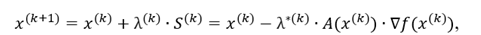

де матриця A(x^(k)), яку іноді називають матрицею напрямів або метрикою, представляє собою апроксимацію оберненої матриці Гессе в точці x^(k), λ^*(k) - скаляр, який визначається за допомогою методів одновимірного пошуку, а ∇f(x^(k))- значення градієнта в точці x^(k). 
Метрика A – змінюється на кожній ітерації. Важливою її властивістю є те, що вона завжди додатно визначена. Як правило:

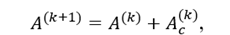

де Ac^(k) – коригувальна матриця, вибір якої і визначає конкретний метод.

З розкладенного в ряд Тейора ∇f(x) в околі x^(k+1) було отримано:

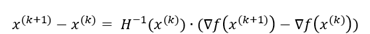

Це рівняння можна розглядати як систему n лінійних рівнянь, що містять n невідомих параметрів, які потрібно оцінити для того, щоб апроксимувати H^(-1) (x^(k)) при заданих значеннях на більш ранніх етапах пошуку. 

Для вирішення цих лінійних рівнянь можуть бути використані різні методи, кожен з яких призводить до різних методів змінної метрики.

*1.2 Метод Бройдена-Флетчера-Гольдфарба-Шанно*

BFGS - один з найбільш широко застосовуваних квазіньютоновскіх
методів. 

При порівнянні даного методу з методом простих ітерацій виявлено, що алгоритм BFGS робить
розрахунки точнішими, сходиться швидше і може працювати з будь-яким видом
цільової функції.

Важливо відзначити, що робота здійснюється на просторі гладких і
опуклих функцій, для яких найбільшою мірою застосуємо даний
квазіньютоновскій метод. Однак, як показують дослідження вчених,
алгоритм  Бройдена-Флетчера-Гольдфарба-Шанно добре справляється з
завданням оптимізації і для неопуклих функцій. Перевагою цього методу є те, що він не дуже залежить від точності обчислень оптимального кроку і дає досить точні результати, навіть при значних похибках обчислення λ^((k)).

В цьому методі пропонується відкинути умову квадратичного закінчення процесу, тобто закінчення процесу пошуку за n кроків у випадку квадратичної функції.  Але в той же час збережено властивість збіжності метрики A до H^(-1) в тому сенсі, що власні значення A прямують до власних значень H^(-1). 

Співвідношення для знаходження A^(k+1) у методі BFGS засновано на рекурентній формулі:

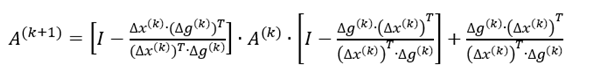

Це співвідношення отримується спочатку підстановкою значень image.png у формулу: 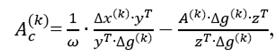 де y та z – довільні вектори, а ω – це ваговий коефіцієнт, що в даному випадку дорівнює 1. Звідки отримаємо співвідношення методу ДФП. Після чого отриманий вираз перетворюється за допомогою формули Шермана-Морісона, що і дає нам наведений вище вираз.

Алгоритм методу виглядає так:

Задано допустиму похибку ε та початкову точку x^((0))

1.	Знайти напрям пошуку за формулою 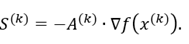 При чому A^(0)= І, де І – одинична матриця.
2. Знайти крок λ^(k) (фіксований чи оптимальний) у напрямку S^(k).
3. Перейти у наступну точку за формулою 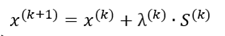.

4. Обчислити ∇f(x^(k+1)).
5. Перевірити виконання критерію закінчення. Якщо критерії закінчення виконується, то пошук закінчено, інакше – перейти до наступного пункту.
6. Обчислити ∆x^(k)  та  ∆g^(k).
7. Обчислити A^((k+1) ) за формулою наведеною вище. 
8. Повернутися допункту 1. 


*1.3 Функція Розенброка*

В якості досліджуваної функції у даній курсовій роботі виступає функція Розенброка - неопукла функція, використовувана для оцінки продуктивності алгоритмів оптимізації.

Функція Розенброка для двох змінних визначається як:
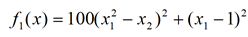

Вона має глобальний мінімум в точці (х, y) = (1, 1) де f (x, y) = 0

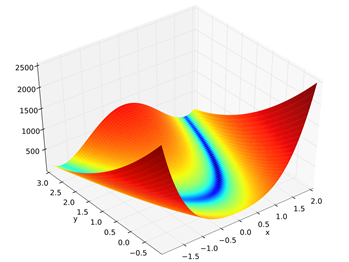


*1.4 Критерії закінчення*

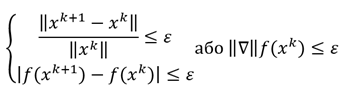

Перший крітерій - крітерій закінчення по відносній похибці;

Другий крітерій - значення норми градієнта функції в точці.

*1.5 Методи штрафних функцій*

Методи штрафних функцій використовуються для вирішення зарач нелінійного програмування.

Загальна задача нелінійного програмування:

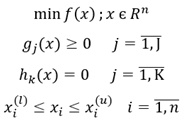

Припускається, що початкова точка x^(0) – відома (може не належати області допустимих значень). 
І будується послідовність image.png   - стаціонарних точок штрафних функцій.

Штрафна функція – це цільова функція задачі безумовної оптимізації, з її допомогою задача умовної оптимізації зводиться до послідовності задач безумовної оптимізації.

Методи штрафних функцій можна розділити на 2 класи:
- Параметричні методи – тут штрафний параметр грає важливу роль. Ці методи діляться в свою чергу на 3 підкласи:
-- Методи внутрішньої точки – тут точки x^((t)) постійно знаходяться всередині допустимої області, для чого будується спеціальний «бар’єр», вздовж границі допустимої області.
-- Методи зовнішньої точки – які і розглядаються у даній курсовій роботі. Тут точки x^((t)) не обов’язково повинні знаходитися всередині допустимої області, але в границі, усе одно, метод вийде на межу допустимої області. Штраф будується так, щоб надати точкам з допустимої області перевагу над точками з-поза допустимої області. 
-- Комбіновані методи (особливо для випадків обмежень - рівностей). В ході мінімізації деякі з обмежень задовольняються, однак при досягненні рішення задовольняються всі умови.
-	Непараметричні методи – в них штрафний параметр виступає в ролі вагового коефіцієнта.

Існує декілька видів штрафних функцій. Їх вигляд та правила за якими перераховуються штрафні параметри визначають конкретний метод.

В загальному випадку, штрафна функція визначається наступним виразом:
image.png

де Ф – штраф, функція від штрафного параметра R і обмежень.

Штрафна функція, яка використовується в даній курсовій роботі – це штрафна функція зі штрафом, вигляду квадрату зрізки:
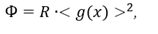

де <∙> - операція зрізки. Тобто
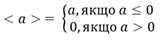

Вигляд штрафу:

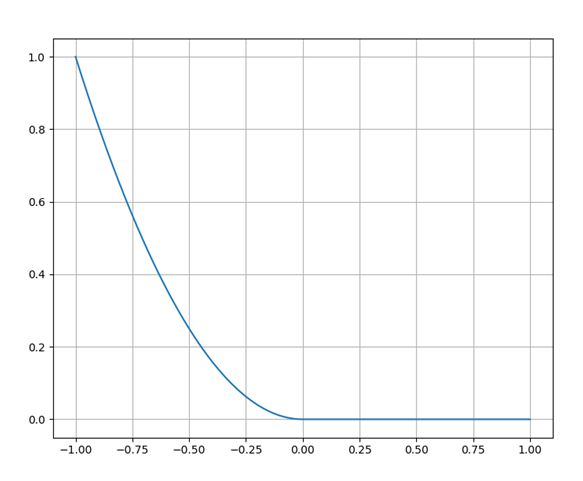

В цьому методі R на кожному кроці зростає і прямує до нескінченності.

Алгоритм методу штрафних функцій
Задано x^((0))  та похибка ε.
1. Побудувати штрафну функцію P(x,R).
2. Знайти x^(t+1) мінімізацією функції P(x^(t+1),R^(t)).
3. Перевірити виконання критерію закінчення. Якщо виконується, то пошук закінчено. Інакше  - продовжувати обчислення.
4. Обчислити R^((t+1))=F(R^((t))). Перейти до пункту 2.





## Реалізація методу
## *Безумовна оптимізація*

Імпорт бібліотек, оголошення констант та цільової функції

In [165]:
import matplotlib.pyplot as plt
import numpy as np
import tkinter

global counter
counter = 0

def evaluate_f(cur_x, cur_y):
    # Отримати значення функції в точці
    global counter
    counter += 1
    return 100 * (cur_x**2 - cur_y)**2 + (cur_x - 1)**2

Оголошення функцій для:

- обчислення значення функції;
- пошуку норми вектора: 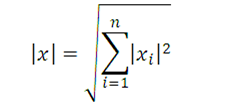;
- реалізації центральної різницевої схеми: 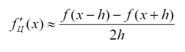;
- реалізації лівої різницевої схеми: 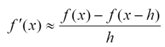;
- реалізації правої різницевої схеми: 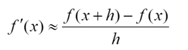;

In [166]:
def calc_f(direction, start, delta):
    return evaluate_f(start[0]+(delta*direction[0]), start[1]+(delta*direction[1]))

def norm(vec):

    if len(vec) != 2:
        raise Exception
    return (vec[0]**2+vec[1]**2)**(1/2)


def central(x, epsilon):

    h = epsilon*norm(x)
    dx = (evaluate_f(x[0]+h, x[1])-evaluate_f(x[0]-h, x[1]))/(2*h)
    dy = (evaluate_f(x[0], x[1]+h)-evaluate_f(x[0], x[1]-h))/(2*h)
    return np.array([dx, dy])

def left(x, epsilon):

    h = epsilon*norm(x)
    dx = (evaluate_f(x[0], x[1])-evaluate_f(x[0]-h, x[1])) / h
    dy = (evaluate_f(x[0], x[1])-evaluate_f(x[0], x[1]-h)) / h
    return np.array([dx, dy])

def right(x, epsilon):

    h = epsilon*norm(x)
    dx = (evaluate_f(x[0]+h, x[1])-evaluate_f(x[0], x[1])) / h
    dy = (evaluate_f(x[0], x[1]+h)-evaluate_f(x[0], x[1])) / h
    return np.array([dx, dy])

Алгоритм Свена

Пошук послідовності точок відбувається до тих пір, поки значення функції в цих точках буде зменшуватися. Коли буде знайдено точка, в якій значення функції перевищує значення функції в попередній точці, здійснюється повернення на половину останнього кроку і обчислюється значення функції в даній точці. Останні чотири отримані точки будуть розташовані один від одного на рівній відстані. Оцінюючи значення функції в цих точках, на основі правила виключення інтервалів визначається інтервал, що містить мінімум заданої функції. Ефективність пошуку залежить від величини кроку. Якщо крок великий - отримуємо грубі оцінки координат граничних точок. Якщо крок невеликий - для обчислення граничних точок може знадобитися великий обсяг обчислень.

In [167]:
def svenn_la(direction, start, dx):

    la0 = 0

    val0 = calc_f(direction, start, la0)
    values_list = [val0]  # Список значень функції у точках, що відповідають знайденим лямбда
    la_list = [la0]  # Список лямбда

    direct = 1
    val1 = calc_f(direction, start, la0-dx)
    val2 = calc_f(direction, start, la0+dx)
    # Визначення знаку dx (в яку сторону рухаємось)
    if (val1 >= val0) and (val0 >= val2):
        values_list.append(val2)
        la_list.append(la0+dx)
    elif (val2 >= val0) and (val0 >= val1):
        direct = -1
        values_list.append(val1)
        la_list.append(la0-dx)
    elif (val1 > val0) and (val0 < val2):
        return [la0-dx, la0, la0+dx]
    ind = 1
    # Реалізація алгоритму Свенна
    while values_list[ind] < values_list[ind - 1]:
        la_i = la_list[ind]+direct*(2**ind)*dx
        la_list.append(la_i)
        values_list.append(calc_f(direction, start, la_i))
        ind += 1
    
    last4 = [la_list[ind], (la_list[ind]+la_list[ind-1])/2, la_list[ind-1], la_list[ind-2]]
    last4_evaluated = []
    for la in last4:
        last4_evaluated.append(calc_f(direction, start, la))
    ''' 
    Повертаємо відсортований (щоб спочатку йшло менше значення) масив, 
    перший елемент якого - початок довірчого інтервалу, другий - кінець
    '''
    if last4_evaluated[1] == min(last4_evaluated):
        return sorted([last4[2], last4[1], last4[0]])
    elif last4_evaluated[2] == min(last4_evaluated):
        return sorted([last4[3], last4[2], last4[1]])

Метод золотого перетину

Метод золотого перетину заснований на поділі відрізку локалізації «золотим перерізом», тобто коли відношення більшої частини відрізку до всього відрізку дорівнює відношенню меншої частини до більшої.

На першій ітерації відрізок ділиться двома симетричними відносно центру точками, також розраховуються значення в цих точках. Частину інтервалу, яка містить кінець відрізка та найближчу до нього поставлену точку, значення в якій максимальне, виключають (0,382 частина інтервалу).

На наступній ітерації треба шукати лише одну нову точку, оскільки одна з двох точок послідовно одержуваних інтервалів завжди збігається з іншою точкою з пари точок попереднього інтервалу.
Процедура триває до тих пір, поки не буде досягнута задана точність.

In [168]:
def gold(start, svenn, direction, epsilon):

    current_interval = svenn
    k1 = 0.382
    k2 = 0.618
    delta = current_interval[1]-current_interval[0]

    la_1 = current_interval[0]+k1*delta
    la_2 = current_interval[0]+k2*delta

    f_la1 = calc_f(direction, start, la_1)
    f_la2 = calc_f(direction, start, la_2)

    while delta > epsilon:
        # Визначаємо, яку частину інтервалу відкинути
        if f_la1 < f_la2:
            current_interval = [current_interval[0], la_2]
            f_la2 = f_la1
            delta = current_interval[1]-current_interval[0]
            la_1 = current_interval[0]+k1*delta
            la_2 = current_interval[0]+k2*delta
            f_la1 = calc_f(direction, start, la_1)
        elif f_la1 > f_la2:
            current_interval = [la_1, current_interval[1]]
            f_la1 = f_la2
            delta = current_interval[1]-current_interval[0]
            la_1 = current_interval[0]+k1*delta
            la_2 = current_interval[0]+k2*delta
            f_la2 = calc_f(direction, start, la_2)
    return (current_interval[0] + current_interval[1])/2

Метод ДСК-Пауелла

Після визначення інтервалу невизначеності методом Свена застосовується метод ДСК-Пауелла, що складається з двох етапів:

1. визначення інтервалу, в якому знаходиться мінімум f (x), і одноразове оцінювання функції за допомогою квадратичної апроксимації (алгоритм ДСК);
2. оцінювання функції за допомогою квадратичної апроксимації до тих пір, поки не буде досягнута необхідна точність (алгоритм Пауелла).

In [169]:
def DSK_P(start, svenn, direction, epsilon):

    counter_cycle = 0

    # Три рівновіддалені точки
    last3 = sorted(svenn)
    dx = abs(last3[1]-last3[0])
    x1 = last3[0]
    x2 = last3[1]
    x3 = last3[2]

    f1 = calc_f(direction, start, x1)
    f2 = calc_f(direction, start, x2)
    f3 = calc_f(direction, start, x3)

    # Перша вершина параболи (порахована за формулами ДСК) та значення в ній
    x_dsk = x2+(dx*(f1-f3))/(2*(f1-2*f2+f3))
    f_x_top = calc_f(direction, start, x_dsk)
    if ((x2-x_dsk) < epsilon) and ((f2-f_x_top) < epsilon):
        return x_dsk
    x_top = x_dsk
    working = True
    while working:
        # Розсташовуємо отримані точки у порядку зростання
        list_x = sorted([(x1, f1), (x2, f2), (x3, f3), (x_top, f_x_top)])
        # знаходимо у цьому списку індекс вершини параболи х*
        inx_x_top = list_x.index((x_top, f_x_top))

        # Визначаємо "сусідні" до х* точки
        list_x = [list_x[inx_x_top-1], list_x[inx_x_top], list_x[inx_x_top+1]]

        x1 = list_x[0][0]
        x2 = list_x[1][0]
        x3 = list_x[2][0]

        f1 = list_x[0][1]
        f2 = list_x[1][1]
        f3 = list_x[2][1]

        a1 = (f2-f1)/(x2-x1)
        a2 = (1/(x3-x2))*((f3-f1)/(x3-x1)-(f2-f1)/(x2-x1))

        if a2 == 0:
            return x_top

        # Знаходимо вершину параболи за звичайними формулами
        x_top = ((x1+x2)/2) - (a1/(2*a2))
        f_x_top = calc_f(direction, start, x_top)

        f_list_unsorted = [f1, f2, f3, f_x_top]
        list_x_unsorted = [x1, x2, x3, x_top]
        f_min = min(f_list_unsorted)

        inx_min = f_list_unsorted.index(f_min)
        x_min = list_x_unsorted[inx_min]

        # Перевірка критерію закінчення
        if ((f_min-f_x_top) < epsilon) and (x_min-x_top < epsilon):
            working = False
        elif counter_cycle == 15:
            working = False
        else:
            counter_cycle += 1
    return x_top

Метод BFGS

In [170]:
def BFGS(x0_vec, run_gold=False, dx_1_dim=0.001, epsilon=0.0001):
    global counter 
    counter = 0

    # Початкова ініціалізація А і х0
    I = np.array([[1, 0], [0, 1]])
    A = I
    x = [np.array(x0_vec)]  # Список, що міститиме координати точок на кожній ітерації
    k = 0
    
    while True:
        # Знаходження градієнту
        grad = central(x[k], epsilon)

        # Перший напрям - напрям за методом Коші
        S = np.matmul(A, grad)
        S[0] = -S[0]
        S[1] = -S[1]

        # В залежності від точності, використовувати метод ДСК-Пауела або золотого перетину
        svenn = svenn_la(S, x[k], dx=dx_1_dim)
        if run_gold:
            la_opt = gold(x[k], svenn, S, epsilon=epsilon)
        else:
            la_opt = DSK_P(x[k], svenn, S, epsilon=epsilon)
        #print("la_opt = ", la_opt)

        # Точка x_(k+1)
        x_new = x[k] + la_opt*S
        x.append(x_new)

        grad_k = grad  # grad(f(x_k))
        grad_k_1 = central(x[k+1], epsilon)  # grad(f(x_k+1))

        # Транспонований вектор dg (різниця градієнтів)
        dg_T = grad_k_1 - grad_k
        dg_T = np.array([dg_T])

        # Транспонований вектор dx (різниця x_(k+1) i x_(k))        
        dx_T = x[k+1]-x[k]
        dx_T = np.array([dx_T])
        
        dg = dg_T.transpose()
        dx = dx_T.transpose()

        # Перевірка критерію закінчення
        if (norm(x[k+1]-x[k])/norm(x[k]) < epsilon) and \
           ((evaluate_f(x[k+1][0], x[k+1][1])-evaluate_f(x[k][0], x[k][1])) < epsilon):
            print("Крітерій закінчення 1")
            break
        if norm(grad_k_1) < epsilon:
            print("Крітерій закінчення 2")
            break
        ''' 
        Обчсилення матриці А. Vor i Nach_coef -- це "матриці-коефіцієнти", що стоять перед і після матриці А в 
        першому доданці у формулі, schliess_teil - другий доданок.
        '''
        vor_coef = I - (np.matmul(dx, dg_T)/np.matmul(dx_T, dg))
        nach_coef = I - (np.matmul(dg, dx_T)/np.matmul(dx_T, dg))

        schliess_teil = np.matmul(dx, dx_T)/np.matmul(dx_T, dg)

        first = np.matmul(vor_coef, A)
        
        second = np.matmul(first, nach_coef)

        A = second + schliess_teil    

        k += 1
    print("x_opt = ", x[-1])
    return x

Порівняємо роботу методів одновимірного пошуку. Схема обчислення похідних - центральна. Крок алгоритму Свенна та точність будемо змінювати:

Метод золотого перетину з кроком 0,001 та точністю 10^(-4)

In [104]:
x = BFGS([-1.2, 0], run_gold=True, dx_1_dim=0.001, epsilon=0.0001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 1
x_opt =  [0.99998971 0.99997752]

[array([-1.2,  0. ]), array([-0.48045146,  0.29791544]), array([-0.43103981,  0.18170335]), array([-0.39461414,  0.13175655]), array([-0.23647502,  0.01222023]), array([0.16880554, 0.00864938]), array([0.16101917, 0.02173792]), array([0.31518797, 0.07519736]), array([0.4796406 , 0.20221527]), array([0.49118044, 0.2432351 ]), array([0.58767416, 0.33557515]), array([0.64619628, 0.39965255]), array([0.79271541, 0.62019628]), array([0.79602658, 0.63406076]), array([0.87728139, 0.76298895]), array([0.93973204, 0.87650614]), array([0.9435436 , 0.89058694]), array([0.98343342, 0.96535188]), array([0.99586795, 0.99202274]), array([0.99887722, 0.99776954]), array([0.99996399, 0.99991435]), array([0.99998971, 0.99997752])]

Кількість обчислень функції =  927
Кількість ітерацій =  22


Метод ДСК-Пауелла з кроком 0,001 та точністю 10^(-4)

In [105]:
x = BFGS([-1.2, 0], run_gold=False, dx_1_dim=0.001, epsilon=0.0001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 1
x_opt =  [0.99999647 0.99999308]

[array([-1.2,  0. ]), array([0.21259553, 0.58485841]), array([0.44692281, 0.20130651]), array([0.45054314, 0.19925003]), array([0.57045303, 0.30778492]), array([0.70830846, 0.48255664]), array([0.71369514, 0.51013646]), array([0.80808019, 0.64362776]), array([0.892859  , 0.78665591]), array([0.89871515, 0.80822796]), array([0.95472287, 0.90797474]), array([1.00065219, 1.00131406]), array([1.00026632, 1.00056982]), array([0.99999686, 0.99999395]), array([0.99999647, 0.99999308])]

Кількість обчислень функції =  412
Кількість ітерацій =  15


Для заданих параметрів краще впорався метод ДСК-Пауелла, зробивши на 7 ітерацій менше. Але оскільки в нас не велика точність, то бажаного результату ми не досягли.Крітерій закінчення в обох методах - крітерій закінчення по відносній похибці.

Методи золотого перетину та ДСК-Пауелла з тим самим кроком, але з точністю 10^(-6)

In [110]:
x = BFGS([-1.2, 0], run_gold=True, dx_1_dim=0.001, epsilon=0.000001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 1
x_opt =  [1. 1.]

[array([-1.2,  0. ]), array([-0.5040851 ,  0.28813038]), array([-0.47635157,  0.22209387]), array([-0.43089721,  0.15875688]), array([-0.27183542,  0.02810199]), array([0.20953848, 0.02530258]), array([0.20164997, 0.0361846 ]), array([0.32487974, 0.08913186]), array([0.39445051, 0.13139517]), array([0.55837461, 0.29299757]), array([0.5635464 , 0.31871926]), array([0.66049294, 0.42678965]), array([0.71198613, 0.49170357]), array([0.86291284, 0.73352546]), array([0.85604381, 0.73182838]), array([0.92307778, 0.84806226]), array([0.97378356, 0.94381846]), array([0.97558555, 0.9511965 ]), array([0.99985626, 0.99953474]), array([0.99960617, 0.99920677]), array([0.99995639, 0.99991221]), array([1.00000002, 1.00000003]), array([1., 1.])]

Кількість обчислень функції =  1182
Кількість ітерацій =  23


In [111]:
x = BFGS([-1.2, 0], run_gold=False, dx_1_dim=0.001, epsilon=0.000001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 1
x_opt =  [1. 1.]

[array([-1.2,  0. ]), array([0.21259555, 0.58485842]), array([0.44692283, 0.20130652]), array([0.45054316, 0.19925005]), array([0.57045258, 0.30778439]), array([0.70830702, 0.48255451]), array([0.71369419, 0.51013516]), array([0.80807902, 0.64362589]), array([0.892854  , 0.78664661]), array([0.8987129 , 0.80822414]), array([0.95471962, 0.90796853]), array([1.00065906, 1.00132516]), array([1.00029076, 1.00061788]), array([0.99999938, 0.99999881]), array([1., 1.])]

Кількість обчислень функції =  412
Кількість ітерацій =  15


Збільшивши точність ми досягли правильного значення х. І знову Метод ДСК-Пауелла впорався швидше. Крітерій закінчення в обох методах - крітерій закінчення по відносній похибці.

Залишимо точність і змінимо крок алгоритму Свенна :

In [108]:
x = BFGS([-1.2, 0], run_gold=True, dx_1_dim=0.0001, epsilon=0.000001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 2
x_opt =  [0.99999997 0.99999995]

[array([-1.2,  0. ]), array([-0.52048303,  0.28134113]), array([-0.50492664,  0.2440852 ]), array([-0.36883573,  0.10557438]), array([-0.24444478,  0.01220501]), array([0.2115008 , 0.02479068]), array([0.2028761 , 0.03611293]), array([0.35765921, 0.10445727]), array([0.53484262, 0.2611183 ]), array([0.53872115, 0.29091877]), array([0.65600524, 0.41622314]), array([0.75849134, 0.55766485]), array([0.77652007, 0.60506063]), array([0.85493438, 0.72359476]), array([0.92346297, 0.84411301]), array([0.93090424, 0.86714305]), array([0.9746372 , 0.94760156]), array([0.99766591, 0.9955997 ]), array([0.9994849 , 0.99899149]), array([0.99986326, 0.99972525]), array([0.99999901, 0.99999605]), array([0.99999997, 0.99999995])]

Кількість обчислень функції =  1187
Кількість ітерацій =  22


In [112]:
x = BFGS([-1.2, 0], run_gold=False, dx_1_dim=0.0001, epsilon=0.000001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 1
x_opt =  [0.99999995 0.99999991]

[array([-1.2,  0. ]), array([-0.50604215,  0.2873201 ]), array([-0.47639132,  0.21665381]), array([-0.32778388,  0.06909559]), array([-0.13902083, -0.02826715]), array([-0.10734764,  0.01814641]), array([ 0.04336384, -0.02350309]), array([ 0.138941  , -0.01859725]), array([0.56701244, 0.29799352]), array([0.55263739, 0.30221591]), array([0.67959532, 0.44764166]), array([0.81990099, 0.65835898]), array([0.81828072, 0.66936789]), array([0.89830094, 0.80068403]), array([0.98036434, 0.95748193]), array([0.97581492, 0.95187975]), array([0.99923053, 0.99813428]), array([0.99923293, 0.9984665 ]), array([0.9999999 , 0.99999921]), array([0.99999995, 0.99999991])]

Кількість обчислень функції =  618
Кількість ітерацій =  20


Зменшення кроку призвело до збільшення кількості ітерацій в методі ДСК-Пауелла. Метод золотого перетину впорався швидше з меншим кроком, але точне значення х не було отримано.
Крітерій закінчення в методі золотого перетину - значення норми градієнта функції в точці.
Крітерій закінчення в ДСК-Пауелла - крітерій закінчення по відносній похибці.

Збільшимо крок і подивимось на отримані результати:

In [113]:
x = BFGS([-1.2, 0], run_gold=True, dx_1_dim=0.01, epsilon=0.000001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 2
x_opt =  [1. 1.]

[array([-1.2,  0. ]), array([-1.20022967e+00, -9.50893752e-05]), array([-1.73355677,  1.8617567 ]), array([-1.52972706,  2.21266292]), array([-1.5158684 ,  2.30054122]), array([-1.31759262,  1.69382803]), array([-1.20832025,  1.39352959]), array([-0.82210501,  0.62366805]), array([-0.83443339,  0.69149277]), array([-0.62604444,  0.34991833]), array([-0.44192182,  0.13955364]), array([-0.38564381,  0.16078542]), array([-0.22657723,  0.02206072]), array([-0.12723402, -0.02835763]), array([0.26149173, 0.04609673]), array([0.25108289, 0.05866103]), array([0.4015129 , 0.13897484]), array([0.53589749, 0.26813145]), array([0.54191137, 0.29388005]), array([0.66013987, 0.42161585]), array([0.76718185, 0.57136801]), array([0.78125143, 0.61200385]), array([0.86057134, 0.73331278]), array([0.93212086, 0.86072233]), array([0.93624687, 0.87687052]), array([0.9706463, 0.9408417]), array([0.99439082, 0.98722547]), array([0.99588457, 0.99182395]), array([0.999943

In [114]:
x = BFGS([-1.2, 0], run_gold=False, dx_1_dim=0.01, epsilon=0.000001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 2
x_opt =  [0.99999997 0.99999994]

[array([-1.2,  0. ]), array([0.65820989, 0.76935659]), array([0.74527508, 0.62124724]), array([0.76939538, 0.59115311]), array([0.83004772, 0.68038416]), array([0.91299486, 0.82412347]), array([0.91645872, 0.84019491]), array([0.96733074, 0.93291537]), array([0.99808494, 0.99663938]), array([1.000574  , 1.00118107]), array([0.99999109, 0.99998386]), array([0.99999997, 0.99999994])]

Кількість обчислень функції =  279
Кількість ітерацій =  12


При збільшенні кроку метод ДСК-Пауелла швидше досягнув заданої точності. З цими параметрами кількість ітерацій найменша з усіх тестів. Хоча бажаного значення х мі не досягнули, даний результат краще попереднього. Крітерій закінчення в обох методах - значення норми градієнта функції в точці. 

Збільшимо точність до 10^(-8) для методу ДСК-Пауелла:

In [93]:
x = BFGS([-1.2, 0], run_gold=False, dx_1_dim=0.01, epsilon=0.00000001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 2
x_opt =  [1. 1.]

[array([-1.2,  0. ]), array([0.65821464, 0.76935496]), array([0.74527703, 0.62125268]), array([0.76939887, 0.59115847]), array([0.8300525 , 0.68039223]), array([0.913055  , 0.82423679]), array([0.91649198, 0.84025362]), array([0.96736829, 0.93298932]), array([0.99804352, 0.99656035]), array([1.00056637, 1.00116551]), array([0.99999106, 0.99998378]), array([0.99999997, 0.99999993]), array([1., 1.]), array([1., 1.])]

Кількість обчислень функції =  335
Кількість ітерацій =  14


Отримане значення х = (1;1), але обчислення збільшилось на одну ітерацію, що означає більшу кількість обчислень функції. Тому було вирішено зупинитися на точності 10^(-6) для заданого кроку.

При порівнянні методів залежно від значень кроку та точності метод ДСК-Пауелла загалом показав себе кращим ніж метод золотого перетину, тому працювати далі будемо з ним.

Тепер порівняємо різні схеми обчислення похідних. Всі попередні обрахунки виконувалися за допомогою центральної різницевої схеми. Перейдемо до правої різницевої схеми. Метод та параметри залишуться такі ж самі.

In [115]:
def BFGS(x0_vec, run_gold=False, dx_1_dim=0.01, epsilon=0.000001):
    global counter 
    counter = 0

    
    # Початкова ініціалізація А і х0
    I = np.array([[1, 0], [0, 1]])
    A = I
    x = [np.array(x0_vec)]  # Список, що міститиме координати точок на кожній ітерації
    k = 0
    
    while True:
        # Знаходження градієнту
        grad = right(x[k], epsilon)

        # Перший напрям - напрям за методом Коші
        S = np.matmul(A, grad)
        S[0] = -S[0]
        S[1] = -S[1]

        # В залежності від точності, використовувати метод ДСК-Пауела або золотого перетину
        svenn = svenn_la(S, x[k], dx=dx_1_dim)
        if run_gold:
            la_opt = gold(x[k], svenn, S, epsilon=epsilon)
        else:
            la_opt = DSK_P(x[k], svenn, S, epsilon=epsilon)
        #print("la_opt = ", la_opt)

        # Точка x_(k+1)
        x_new = x[k] + la_opt*S
        x.append(x_new)

        grad_k = grad  # grad(f(x_k))
        grad_k_1 = right(x[k+1], epsilon)  # grad(f(x_k+1))

        # Транспонований вектор dg (різниця градієнтів)
        dg_T = grad_k_1 - grad_k
        dg_T = np.array([dg_T])

        # Транспонований вектор dx (різниця x_(k+1) i x_(k))        
        dx_T = x[k+1]-x[k]
        dx_T = np.array([dx_T])
        
        dg = dg_T.transpose()
        dx = dx_T.transpose()

        # Перевірка критерію закінчення
        if (normale(x[k+1]-x[k])/normale(x[k]) < epsilon) and \
           ((evaluate_f(x[k+1][0], x[k+1][1])-evaluate_f(x[k][0], x[k][1])) < epsilon):
            print("Крітерій закінчення 1")
            break
        if normale(grad_k_1) < epsilon:
            print("Крітерій закінчення 2")
            break
        ''' 
        Обчсилення матриці А. Vor i Nach_coef -- це "матриці-коефіцієнти", що стоять перед і після матрицею А в 
        першому доданці у формулі. schliess_teil - другий доданок
        '''
        vor_coef = I - (np.matmul(dx, dg_T)/np.matmul(dx_T, dg))
        nach_coef = I - (np.matmul(dg, dx_T)/np.matmul(dx_T, dg))

        schliess_teil = np.matmul(dx, dx_T)/np.matmul(dx_T, dg)

        first = np.matmul(vor_coef, A)
        
        second = np.matmul(first, nach_coef)

        A = second + schliess_teil    

        k += 1
    print("x_opt = ", x[-1])
    return x

In [116]:
x = BFGS([-1.2, 0], run_gold=False, dx_1_dim=0.01, epsilon=0.000001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 1
x_opt =  [0.99996308 0.99993779]

[array([-1.2,  0. ]), array([0.6582111 , 0.76935793]), array([0.74527614, 0.62124906]), array([0.76939617, 0.59115434]), array([0.83017731, 0.6805985 ]), array([0.91350088, 0.82507551]), array([0.9166954 , 0.84060619]), array([0.96762621, 0.93349415]), array([0.99669467, 0.99397823]), array([1.00020535, 1.00042349]), array([0.99999949, 1.00001168]), array([0.99996589, 0.9999435 ]), array([0.99996326, 0.99993816]), array([0.99996308, 0.99993779])]

Кількість обчислень функції =  311
Кількість ітерацій =  14


Отриманий результат гірше ніж при використанні центральної схеми.

Повторимо ці самі дії для лівої:

In [117]:
def BFGS(x0_vec, run_gold=False, dx_1_dim=0.01, epsilon=0.000001):
    global counter 
    counter = 0
    
    # Початкова ініціалізація А і х0
    I = np.array([[1, 0], [0, 1]])
    A = I
    x = [np.array(x0_vec)]  # Список, що міститиме координати точок на кожній ітерації
    k = 0
    
    while True:
        # Знаходження градієнту
        grad = left(x[k], epsilon)

        # Перший напрям - напрям за методом Коші
        S = np.matmul(A, grad)
        S[0] = -S[0]
        S[1] = -S[1]

        # В залежності від точності, використовувати метод ДСК-Пауела або золотого перетину
        svenn = svenn_la(S, x[k], dx=dx_1_dim)
        if run_gold:
            la_opt = gold(x[k], svenn, S, epsilon=epsilon)
        else:
            la_opt = DSK_P(x[k], svenn, S, epsilon=epsilon)
        #print("la_opt = ", la_opt)

        # Точка x_(k+1)
        x_new = x[k] + la_opt*S
        x.append(x_new)

        grad_k = grad  # grad(f(x_k))
        grad_k_1 = left(x[k+1], epsilon)  # grad(f(x_k+1))

        # Транспонований вектор dg (різниця градієнтів)
        dg_T = grad_k_1 - grad_k
        dg_T = np.array([dg_T])

        # Транспонований вектор dx (різниця x_(k+1) i x_(k))        
        dx_T = x[k+1]-x[k]
        dx_T = np.array([dx_T])
        
        dg = dg_T.transpose()
        dx = dx_T.transpose()

        # Перевірка критерію закінчення
        if (normale(x[k+1]-x[k])/normale(x[k]) < epsilon) and \
           ((evaluate_f(x[k+1][0], x[k+1][1])-evaluate_f(x[k][0], x[k][1])) < epsilon):
            print("Крітерій закінчення 1")
            break
        if normale(grad_k_1) < epsilon:
            print("Крітерій закінчення 2")
            break
        ''' 
        Обчсилення матриці А. Vor i Nach_coef -- це "матриці-коефіцієнти", що стоять перед і після матрицею А в 
        першому доданці у формулі. schliess_teil - другий доданок
        '''
        vor_coef = I - (np.matmul(dx, dg_T)/np.matmul(dx_T, dg))
        nach_coef = I - (np.matmul(dg, dx_T)/np.matmul(dx_T, dg))

        schliess_teil = np.matmul(dx, dx_T)/np.matmul(dx_T, dg)

        first = np.matmul(vor_coef, A)
        
        second = np.matmul(first, nach_coef)

        A = second + schliess_teil    

        k += 1
    print("x_opt = ", x[-1])
    return x

In [118]:
x = BFGS([-1.2, 0], run_gold=False, dx_1_dim=0.01, epsilon=0.000001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 1
x_opt =  [1.00040586 1.0008033 ]

[array([-1.2,  0. ]), array([0.65820867, 0.76935526]), array([0.74527402, 0.62124543]), array([0.76939459, 0.59115188]), array([0.82991888, 0.68017107]), array([0.91249629, 0.82318609]), array([0.91623069, 0.8397996 ]), array([0.96704614, 0.9323579 ]), array([0.99931225, 0.99895764]), array([1.00084359, 1.00173261]), array([1.00036346, 1.00070211]), array([1.0004014, 1.0007923]), array([1.0004057 , 1.00080291]), array([1.00040586, 1.0008033 ])]

Кількість обчислень функції =  325
Кількість ітерацій =  14


Результат знову гірше.

Що ж, можна зробити висновок, що краще використовувати центральну різницеву схему. Це очевидний варіант, адже вона має 2-й порядок точності. Це підтвердилося експериментально. Для точності 10^(-6), ліва і права схеми потребують на 30-40 обчислень функції більше.

Перевіримо збіжність методу залежно від величини кроку h при обчисленні похідних центральною схемою. У загальному випадку крок обчислювався 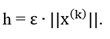

Це, як правило, рекомендується в літературі. Зокрема через те, що вираз для оптимального кроку диференціювання для центральної схеми виглядає так: 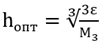, де М_3  - максимум третьої похідної. Так як іншої апроксимації у нас не має, то 1/М_3  можна замінити принаймні на ||x^(k)||. 
 Але для дослідження спочатку візьмемо 0.00001

In [119]:
def central(x, epsilon):

    h = epsilon*norm(x)
    dx = (evaluate_f(x[0]+h, x[1])-evaluate_f(x[0]-h, x[1]))/ 0.00001
    dy = (evaluate_f(x[0], x[1]+h)-evaluate_f(x[0], x[1]-h))/0.00001
    return np.array([dx, dy])

In [121]:
x = BFGS([-1.2, 0], run_gold=False, dx_1_dim=0.01, epsilon=0.000001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 2
x_opt =  [1. 1.]

[array([-1.2,  0. ]), array([0.17437099, 0.56903227]), array([0.38595899, 0.14964157]), array([0.38849109, 0.1473175 ]), array([0.51219891, 0.24336882]), array([0.59341241, 0.32684729]), array([0.80294474, 0.63274423]), array([0.79711665, 0.63430569]), array([0.88428806, 0.77480351]), array([0.96927967, 0.93430826]), array([0.96613113, 0.93319484]), array([0.99608638, 0.99145769]), array([0.9980057, 0.9960649]), array([0.99996856, 0.99992743]), array([0.99999855, 0.99999715]), array([1., 1.])]

Кількість обчислень функції =  395
Кількість ітерацій =  16


Отриманий результат виявився гіршим ніж ми отримували.

Зменшимо крок до 0.000001

In [122]:
def central(x, epsilon):

    h = epsilon*norm(x)
    dx = (evaluate_f(x[0]+h, x[1])-evaluate_f(x[0]-h, x[1]))/ 0.000001
    dy = (evaluate_f(x[0], x[1]+h)-evaluate_f(x[0], x[1]-h))/0.000001
    return np.array([dx, dy])

In [123]:
x = BFGS([-1.2, 0], run_gold=False, dx_1_dim=0.01, epsilon=0.000001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 1
x_opt =  [1. 1.]

[array([-1.2,  0. ]), array([0.16207136, 0.56393984]), array([0.33931167, 0.21119575]), array([0.38121841, 0.14279306]), array([0.44732553, 0.18189467]), array([0.53473052, 0.25989927]), array([0.71117568, 0.48598213]), array([0.71746324, 0.515619  ]), array([0.81226508, 0.6505522 ]), array([0.88028422, 0.76336756]), array([0.91152575, 0.83326339]), array([0.95496093, 0.90923071]), array([0.98932361, 0.97592666]), array([0.99078991, 0.98171159]), array([0.99969702, 0.9992917 ]), array([0.99991791, 0.99983758]), array([0.99999991, 0.99999979]), array([1., 1.])]

Кількість обчислень функції =  438
Кількість ітерацій =  18


Кількість обчислень функції збільшилась.

Зменшимо крок до 0.0001

In [128]:
def central(x, epsilon):

    h = epsilon*norm(x)
    dx = (evaluate_f(x[0]+h, x[1])-evaluate_f(x[0]-h, x[1]))/ 0.0001
    dy = (evaluate_f(x[0], x[1]+h)-evaluate_f(x[0], x[1]-h))/0.0001
    return np.array([dx, dy])

In [129]:
x = BFGS([-1.2, 0], run_gold=False, dx_1_dim=0.01, epsilon=0.000001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))

Крітерій закінчення 2
x_opt =  [0.99974165 0.99947601]

[array([-1.2,  0. ]), array([-0.48051454,  0.29788932]), array([-0.51684733,  0.27654254]), array([-0.4182937 ,  0.14611032]), array([-0.24576214,  0.01519929]), array([-0.25255317,  0.06181396]), array([-0.06060918, -0.02898539]), array([-0.05642868,  0.00448702]), array([ 0.08467558, -0.01971135]), array([ 0.15149289, -0.01443193]), array([0.21190906, 0.00053088]), array([0.32325875, 0.05677326]), array([0.51050978, 0.22387458]), array([0.55018276, 0.30724342]), array([0.65229065, 0.41291036]), array([0.71013275, 0.48597842]), array([0.87276341, 0.75184086]), array([0.86743965, 0.75167396]), array([0.93955574, 0.87800299]), array([0.99192245, 0.98525177]), array([0.99974165, 0.99947601])]

Кількість обчислень функції =  546
Кількість ітерацій =  21


І знову результат нас не задовільняє. Отже, при обчисленні похідних крок буде рахуватися за формулою 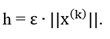

Виведемо отримані під час виконання метода ДСК-Пауелла лямбди:

In [133]:
def BFGS(x0_vec, run_gold=False, dx_1_dim=0.001, epsilon=0.0001):
    global counter 
    counter = 0

    # Початкова ініціалізація А і х0
    I = np.array([[1, 0], [0, 1]])
    A = I
    x = [np.array(x0_vec)]  # Список, що міститиме координати точок на кожній ітерації
    k = 0
    
    while True:
        # Знаходження градієнту
        grad = central(x[k], epsilon)

        # Перший напрям - напрям за методом Коші
        S = np.matmul(A, grad)
        S[0] = -S[0]
        S[1] = -S[1]

        # В залежності від точності, використовувати метод ДСК-Пауела або золотого перетину
        svenn = svenn_la(S, x[k], dx=dx_1_dim)
        if run_gold:
            la_opt = gold(x[k], svenn, S, epsilon=epsilon)
        else:
            la_opt = DSK_P(x[k], svenn, S, epsilon=epsilon)
        print("la_opt = ", la_opt)

        # Точка x_(k+1)
        x_new = x[k] + la_opt*S
        x.append(x_new)

        grad_k = grad  # grad(f(x_k))
        grad_k_1 = central(x[k+1], epsilon)  # grad(f(x_k+1))

        # Транспонований вектор dg (різниця градієнтів)
        dg_T = grad_k_1 - grad_k
        dg_T = np.array([dg_T])

        # Транспонований вектор dx (різниця x_(k+1) i x_(k))        
        dx_T = x[k+1]-x[k]
        dx_T = np.array([dx_T])
        
        dg = dg_T.transpose()
        dx = dx_T.transpose()

        # Перевірка критерію закінчення
        if (norm(x[k+1]-x[k])/norm(x[k]) < epsilon) and \
           ((evaluate_f(x[k+1][0], x[k+1][1])-evaluate_f(x[k][0], x[k][1])) < epsilon):
            print("Крітерій закінчення 1")
            break
        if norm(grad_k_1) < epsilon:
            print("Крітерій закінчення 2")
            break
        ''' 
        Обчсилення матриці А. Vor i Nach_coef -- це "матриці-коефіцієнти", що стоять перед і після матриці А в 
        першому доданці у формулі, schliess_teil - другий доданок.
        '''
        vor_coef = I - (np.matmul(dx, dg_T)/np.matmul(dx_T, dg))
        nach_coef = I - (np.matmul(dg, dx_T)/np.matmul(dx_T, dg))

        schliess_teil = np.matmul(dx, dx_T)/np.matmul(dx_T, dg)

        first = np.matmul(vor_coef, A)
        
        second = np.matmul(first, nach_coef)

        A = second + schliess_teil    

        k += 1
    print("x_opt = ", x[-1])
    return x

In [171]:
x = BFGS([-1.2, 0], run_gold=False, dx_1_dim=0.01, epsilon=0.000001)
print("")
print(x)
print("")
print("Кількість обчислень функції = ", counter)
print("Кількість ітерацій = ", len(x))



Крітерій закінчення 2
x_opt =  [0.99999997 0.99999994]

[array([-1.2,  0. ]), array([0.65820989, 0.76935659]), array([0.74527508, 0.62124724]), array([0.76939538, 0.59115311]), array([0.83004772, 0.68038416]), array([0.91299486, 0.82412347]), array([0.91645872, 0.84019491]), array([0.96733074, 0.93291537]), array([0.99808494, 0.99663938]), array([1.000574  , 1.00118107]), array([0.99999109, 0.99998386]), array([0.99999997, 0.99999994])]

Кількість обчислень функції =  279
Кількість ітерацій =  12


При такому виборі параметрів, не настає моменту, коли потрібно вводити рестарти, адже оптимальний крок ніколи не стає меншим за задане значення ε.

Побудуємо шлях пошуку точки мінімуму, враховуючи усі обрані параметри

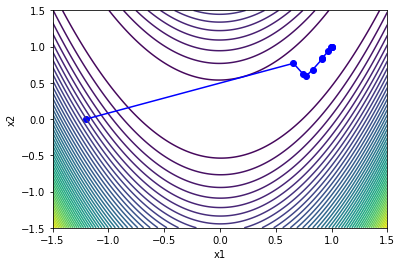

In [172]:
start, stop, n_values = -1.5, 1.5, 2000
x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z = (100 * (X ** 2 - Y) ** 2 + (X - 1) ** 2)

x_list = []
y_list = []
for lis in x:
    x_list.append(lis[0])
    y_list.append(lis[1])

plt.contour(X, Y, Z, levels=50)
plt.plot(x_list, y_list, color="blue")
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x_list, y_list, color="blue")
plt.show()

Шлях в околі точки мінімума

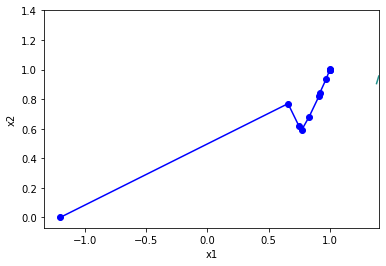

In [140]:
start, stop, n_values = 0.9, 1.4, 2000
x_vals = np.linspace(start, stop, n_values)
y_vals = np.linspace(start, stop, n_values)
X, Y = np.meshgrid(x_vals, y_vals)

Z = (100 * (X ** 2 - Y) ** 2 + (X - 1) ** 2)

x_list = []
y_list = []
for lis in x:
    x_list.append(lis[0])
    y_list.append(lis[1])

plt.contour(X, Y, Z, levels=0)
plt.plot(x_list, y_list, color="blue")
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x_list, y_list, color="blue")
plt.show()

## Умовна оптимізація

Варто відзначити, що для різних областей і різних початкових точок доцільно було змінювати початкове значення штрафного параметру R. До того ж, будемо використовувати метод золотого перетину, адже метод ДСК-Пауела працює для деяких з наборів параметрів. 

Імпорт бібліотек

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

global counter
counter = 0

global epsilon
epsilon = 0.000001

global_points = []


def evaluate_f(x, y, R):

    global counter
    counter += 1
    if ((x**2 + y**2) <= 1) and (((x+0.5)**2 + y**2) >= 0.0625):
        return 100 * (x**2 - y)**2 + (x - 1)**2
    else:
        return 100 * (x**2 - y)**2 + (x - 1)**2 + R*(x**2+y**2)**2

Оголошення функцій

In [158]:
def calc_f(direction, start, delta, R):
    return evaluate_f(start[0] + (delta * direction[0]), start[1] + (delta * direction[1]), R)

def norm(vec):
    if (len(vec) != 2):
        raise Exception

    return (vec[0] ** 2 + vec[1] ** 2) ** (1 / 2)


def central(x, epsilon, R):
    h = epsilon * norm(x)
    dx = (evaluate_f(x[0] + h, x[1], R) - evaluate_f(x[0] - h, x[1], R)) / (2 * h)
    dy = (evaluate_f(x[0], x[1] + h, R) - evaluate_f(x[0], x[1] - h, R)) / (2 * h)
    return np.array([dx, dy])

Алгоритм Свена

In [159]:
def svenn_la(direction, start, dx, R):

    la0 = 0

    v0 = calc_f(direction, start, la0, R)
    values_list = [v0]  # Список значень функції у точках, що відповідають знайденим лямбда
    la_list = [la0]  # Список лямбда

    v1 = calc_f(direction, start, la0-dx, R)
    v2 = calc_f(direction, start, la0+dx, R)
    # Визначення знаку dx (в яку сторону рухаємось)
    determinator = 1
    if (v1 > v0) and (v0 > v2):
        determinator = 1
        values_list.append(v2)
        la_list.append(la0 + dx)
    elif (v1 < v0) and (v0 < v2):
        determinator = -1
        values_list.append(v1)
        la_list.append(la0 - dx)
    elif (v1 >= v0) and (v0 <= v2):
        return [la0 - dx, la0 + dx]
    ind = 1
    # Реалізація алгоритму Свенна
    while values_list[ind] < values_list[ind-1]:
        la_i = la_list[ind] + determinator * (2**ind) * dx
        la_list.append(la_i)
        values_list.append(calc_f(direction, start, la_i, R))
        ind += 1

    # Останні 3 "точки" (значення лямбда)
    last4 = [la_list[ind], (la_list[ind] + la_list[ind - 1]) / 2, la_list[ind - 1], la_list[ind - 2]]
    last4_evaluated = []
    for la in last4:
        last4_evaluated.append(calc_f(direction, start, la, R))
    # Індекс того лямбда, якому відповідає найме значення цільової функції
    mn = min(last4_evaluated)
    # Повертаємо відсортований (щоб спочатку йшло менше значення) масив, перщий елемент якого - початок довірчого інтервалу, другий - кінець
    if last4_evaluated[1] == mn:
        return sorted([last4[2], last4[0]])
    elif last4_evaluated[2] == mn:
        return sorted([last4[3], last4[1]])

Метод золотого перетину

In [160]:
def gold(start, svenn, direction,R):

    current_interval = svenn

    L = current_interval[1] - current_interval[0]
    k1 = 0.382
    k2 = 0.618
    la_1 = current_interval[0] + k1 * L
    la_2 = current_interval[0] + k2 * L

    f_la1 = calc_f(direction, start, la_1, R)
    f_la2 = calc_f(direction, start, la_2, R)

    while (L > 0.01):
        # Визначаємо, яку частину інтервалу відкинути
        if (f_la1 < f_la2):
            current_interval = [current_interval[0], la_2]
            f_la2 = f_la1
            L = current_interval[1] - current_interval[0]
            la_1 = current_interval[0] + k1 * L
            la_2 = current_interval[0] + k2 * L
            f_la1 = calc_f(direction, start, la_1, R)

        elif (f_la1 > f_la2):
            current_interval = [la_1, current_interval[1]]
            f_la1 = f_la2
            L = current_interval[1] - current_interval[0]
            la_1 = current_interval[0] + k1 * L
            la_2 = current_interval[0] + k2 * L
            f_la2 = calc_f(direction, start, la_2, R)

    return (current_interval[0] + current_interval[1]) / 2

Метод BFGS

In [161]:
def BFGS(x0_vec, R=0, dx_1_dim=0.001557, epsilon_DSK=0.000001):
    #global counter
    #counter = 0

    # Початкова ініціалізація А і х0
    I = np.array([[1, 0], [0, 1]])
    A = I  # A0
    x = [np.array(x0_vec)]  # Список, що міститиме координати точок на кожній ітерації
    k = 0

    while True:
        # Знаходження градієнту
        grad = central(x[k], epsilon_DSK, R)
        # Перший напрям - напрям за методом Коші
        S = np.matmul(A, grad)
        S[0] = -S[0]
        S[1] = -S[1]

        # золотого перетину
        svenn = svenn_la(S, x[k], R=R, dx=dx_1_dim)
        la_opt = gold(x[k], svenn, S, R)

        # Точка x_(k+1)
        x_new = x[k] + la_opt * S
        x.append(x_new)

        grad_k = grad  # grad(f(x_k))
        grad_k_1 = central(x[k + 1], epsilon_DSK, R)  # grad(f(x_k+1))

        # Транспонований вектор dg (різниця градієнтів)
        dg_T = grad_k_1 - grad_k
        dg_T = np.array([dg_T])

        # Транспонований вектор dx (різниця x_(k+1) i x_(k))
        dx_T = x[k + 1] - x[k]
        dx_T = np.array([dx_T])

        dg = dg_T.transpose()
        dx = dx_T.transpose()

        # Перевірка критерію закінчення
        if (norm(x[k] - x[k + 1]) / norm(x[k]) < epsilon_DSK) and \
           ((evaluate_f(x[k][0], x[k][1],R) - evaluate_f(x[k + 1][0], x[k + 1][1],R)) < epsilon_DSK):
            break
        if norm(grad_k_1) < epsilon_DSK:
            break

        # Обчсилення матриці А. Vor i Nach_coef -- це "матриці-коефіцієнти", що стоять перед і після матрицею А в першому доданці у формулі. schliess_teil - другий доданок
        vor_coef = I - (np.matmul(dx, dg_T) / np.matmul(dx_T, dg))
        nach_coef = I - (np.matmul(dg, dx_T) / np.matmul(dx_T, dg))

        schliess_teil = np.matmul(dx, dx_T) / np.matmul(dx_T, dg)

        first = np.matmul(vor_coef, A)

        second = np.matmul(first, nach_coef)

        A = second + schliess_teil

        k += 1

    print("x_opt = ", x[-1])
    return x

*Опукла область*

В якості опуклої області взято звичайний круг з центром в точці (0;0) та радіусом 1.
Візьмемо початкову точку (-1.2;0) та побудуємо шлях пошуку. Тут початкове значення R=80. Правило зміни: R^k=10*R^(k-1).


In [137]:
end_UO = False

x_k_list = [[-1.2,0]]

R_param = 80
while end_UO != True:
    x_k = x_k_list[-1]
    x = BFGS(x_k, R=R_param)
    print("Кількість обчислень функції=", counter)

    x_k_1 = x[-1]
    x_k_list.append(x_k_1)

    for dot in x:
        global_points.append(dot)

    if ((norm(np.array(x_k_1) - np.array(x_k)))/norm(x_k) < epsilon):
        end_UO = True
        break

    R_param *= 10


x_list = []
y_list = []
for lis in x_k_list:
   x_list.append(lis[0])
   y_list.append(lis[1])

dots_x = []
dots_y = []

for lis in global_points:
   dots_x.append(lis[0])
   dots_y.append(lis[1])

x_opt =  [0.78769968 0.6160565 ]
Кількість обчислень функції= 139
x_opt =  [0.78619522 0.6174311 ]
Кількість обчислень функції= 172
x_opt =  [0.78619522 0.6174311 ]
Кількість обчислень функції= 187


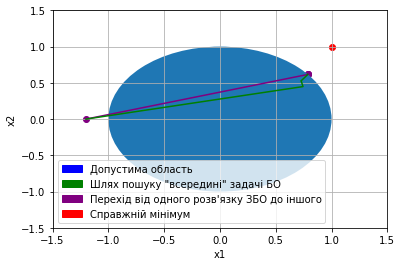

In [138]:
circle1 = plt.Circle((0,0),1,fill=True)
fig, ax = plt.subplots()
ax.add_artist(circle1)
plt.plot(x_list,y_list, color = "purple")
plt.plot(dots_x,dots_y, color = "green")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(x_list,y_list, color = "purple")

plt.scatter([1],[1], color = "red")


blue_patch = mpatches.Patch(color='blue', label='Допустима область')
green_patch = mpatches.Patch(color='green', label='Шлях пошуку "всередині" задачі БО')
purple_patch = mpatches.Patch(color='purple', label='Перехід від одного розв\'язку ЗБО до іншого')
red_patch = mpatches.Patch(color='red', label='Справжній мінімум')
plt.legend(handles=[blue_patch,green_patch,purple_patch,red_patch])
#plt.legend()

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()

Тепер візьмемо початкову точку (0;-1.2) та побудуємо шлях пошуку. Точка мінімуму лежить в допустимій області. Тут початкове значення R=20. Правило зміни: R^k=10*R^(k-1)


In [151]:
end_UO = False

x_k_list = [[0,-1.2]]

R_param = 20
while end_UO != True:
    x_k = x_k_list[-1]
    x = BFGS(x_k, R=R_param)
    print("Кількість обчислень функції=", counter)

    x_k_1 = x[-1]
    x_k_list.append(x_k_1)

    for dot in x:
        global_points.append(dot)

    if ((norm(np.array(x_k_1) - np.array(x_k)))/norm(x_k) < epsilon):
        end_UO = True
        break

    R_param *= 10


x_list = []
y_list = []
for lis in x_k_list:
   x_list.append(lis[0])
   y_list.append(lis[1])

dots_x = []
dots_y = []

for lis in global_points:
   dots_x.append(lis[0])
   dots_y.append(lis[1])

x_opt =  [0.78949284 0.61375875]
Кількість обчислень функції= 175
x_opt =  [0.78949284 0.61375875]
Кількість обчислень функції= 190


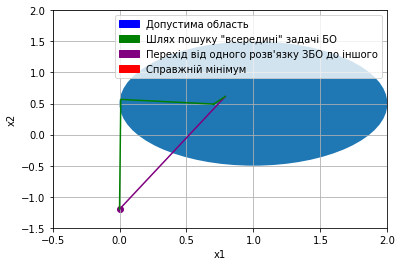

In [156]:
circle1 = plt.Circle((1,0.5),1,fill=True)
fig, ax = plt.subplots()
ax.add_artist(circle1)
plt.plot(x_list,y_list, color = "purple")
plt.plot(dots_x,dots_y, color = "green")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(x_list,y_list, color = "purple")

plt.scatter([1],[1], color = "red")


blue_patch = mpatches.Patch(color='blue', label='Допустима область')
green_patch = mpatches.Patch(color='green', label='Шлях пошуку "всередині" задачі БО')
purple_patch = mpatches.Patch(color='purple', label='Перехід від одного розв\'язку ЗБО до іншого')
red_patch = mpatches.Patch(color='red', label='Справжній мінімум')
plt.legend(handles=[blue_patch,green_patch,purple_patch,red_patch])
#plt.legend()

plt.xlim(-0.5,2)
plt.ylim(-1.5, 2)
plt.grid(True)
plt.show()

*Неопукла область*

В якості не опуклої області було взято класичний приклад двозв’язної області – круг з радіусом 1 з «виколотим кругом», радіусу 0.5 з центрами у точці (0;0).



Повторюємо попередні дії для тих самих точок.

Спочатку точка (-1.2;0)

x_opt =  [0.78768207 0.61607913]
Кількість обчислень функції= 139
x_opt =  [0.78768207 0.61607913]
Кількість обчислень функції= 154


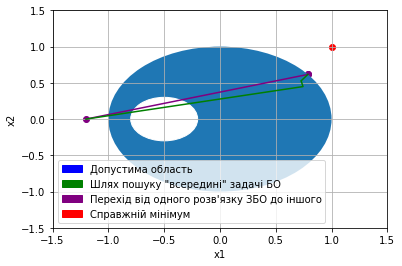

In [248]:
end_UO = False

x_k_list = [[-1.2,0]]

R_param = 80
while end_UO != True:
    x_k = x_k_list[-1]
    x = BFGS(x_k, R=R_param)
    print("Кількість обчислень функції=", counter)

    x_k_1 = x[-1]
    x_k_list.append(x_k_1)

    for dot in x:
        global_points.append(dot)

    if ((norm(np.array(x_k_1) - np.array(x_k)))/norm(x_k) < epsilon):
        end_UO = True
        break

    R_param *= 10


x_list = []
y_list = []
for lis in x_k_list:
   x_list.append(lis[0])
   y_list.append(lis[1])

dots_x = []
dots_y = []

for lis in global_points:
   dots_x.append(lis[0])
   dots_y.append(lis[1])

circle1 = plt.Circle((0,0),1,fill=True)
circle2 = plt.Circle((-0.5,0),0.3,fill=True,color='white')
fig, ax = plt.subplots()
ax.add_artist(circle1)
ax.add_artist(circle2)
plt.plot(x_list,y_list, color = "purple")
plt.plot(dots_x,dots_y, color = "green")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(x_list,y_list, color = "purple")

plt.scatter([1],[1], color = "red")

import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='blue', label='Допустима область')
green_patch = mpatches.Patch(color='green', label='Шлях пошуку "всередині" задачі БО')
purple_patch = mpatches.Patch(color='purple', label='Перехід від одного розв\'язку ЗБО до іншого')
red_patch = mpatches.Patch(color='red', label='Справжній мінімум')
plt.legend(handles=[blue_patch,green_patch,purple_patch,red_patch])
#plt.legend()

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.show()

Тепер точка  (0;-1.2)

x_opt =  [0.78949284 0.61375875]
Кількість обчислень функції= 365
x_opt =  [0.78949284 0.61375875]
Кількість обчислень функції= 380


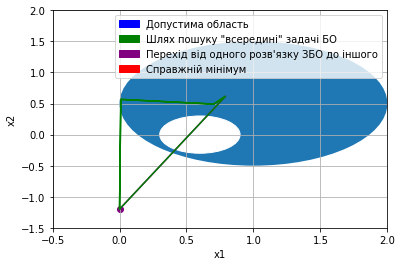

In [163]:
end_UO = False

x_k_list = [[0,-1.2]]

R_param = 20
while end_UO != True:
    x_k = x_k_list[-1]
    x = BFGS(x_k, R=R_param)
    print("Кількість обчислень функції=", counter)

    x_k_1 = x[-1]
    x_k_list.append(x_k_1)

    for dot in x:
        global_points.append(dot)

    if ((norm(np.array(x_k_1) - np.array(x_k)))/norm(x_k) < epsilon):
        end_UO = True
        break

    R_param *= 10


x_list = []
y_list = []
for lis in x_k_list:
   x_list.append(lis[0])
   y_list.append(lis[1])

dots_x = []
dots_y = []

for lis in global_points:
   dots_x.append(lis[0])
   dots_y.append(lis[1])

circle1 = plt.Circle((1,0.5),1,fill=True)
circle2 = plt.Circle((0.6,0),0.3,fill=True,color='white')
fig, ax = plt.subplots()
ax.add_artist(circle1)
ax.add_artist(circle2)
plt.plot(x_list,y_list, color = "purple")
plt.plot(dots_x,dots_y, color = "green")
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(x_list,y_list, color = "purple")

plt.scatter([1],[1], color = "red")


blue_patch = mpatches.Patch(color='blue', label='Допустима область')
green_patch = mpatches.Patch(color='green', label='Шлях пошуку "всередині" задачі БО')
purple_patch = mpatches.Patch(color='purple', label='Перехід від одного розв\'язку ЗБО до іншого')
red_patch = mpatches.Patch(color='red', label='Справжній мінімум')
plt.legend(handles=[blue_patch,green_patch,purple_patch,red_patch])
#plt.legend()

plt.xlim(-0.5,2)
plt.ylim(-1.5, 2)
plt.grid(True)
plt.show()

## Висновки

В ході виконання курсової роботи було досліджено метод Бройдена-Флетчера-Гольдфарба-Шанно для функції Розенброка, в залежності від різних параметрів.

В ході дослідження було виявлено наступне:
1. Для одновимірного пошуку краще застосовувати метод ДСК-Пауелла, адже він досягає заданої точності швидше, порівняно з методом золотого перетину;
2. При обсчисленні з точністю 10^(-6) метод видавав найкращі результати;
3. Для алгоритму Свенна був обраний крок dλ=0.01; 
4. Схема обчислення похідних – центральна різницева схема. Вона потребує меншу кількість обчислень функції, ніж права та ліва схеми;
5. Величина кроку при обчисленні похідних за центральною різницевою схемою h = ε∙||x^(k)||, де ε – задана точність, а ||x^(k)|| - норма поточної точки; 
6. У якості критерію закінчення використовувались і крітерій закінчення по відносній похибці, і значення норми градієнта функції в точці. Але у кінцевому наборі параметрів було використано саме значення норми градієнта функції в точці;
7. Рестарти не застосовувались.

Враховуючи усі параметри, використовуючи метод ДСК-Пауелла було досягнуто бажаної точності (10^(-6)) за 12 ітерації. При цьому кількість обчислень цільової функції дорівнювало 276, що можна вважати досить непоганим результатом, але, можливо, з іншими параметрами міг бути отриман кращий результат.

Що стосується умовної оптимізації, то  тут алгоритм теж показав досить непоганий результат, в найкращому випадку необхідно було 139 обчислення цільової функції, а в найгіршому – 396, як для опуклої, так і для неопуклої допустимої області. 

Тут були використані усі ті ж самі параметри, що й для безумовної оптимізації, окрім методу одновимірного пошуку та кроку алгоритму Свенна, а саме: був застосований метод золотого перетину і крок dλ складає 0.001557.

Знаходження мінімуму функції в умовній оптимізації методом зовнішньої точки при випуклій області відбувається швидше, коли локальний мінімум знаходиться поза областю, ніж коли він знаходиться всередині області. 

Загалом, було продемонстровано, що алгоритм BFGS, як, власне, і усі методи змінної метрики, має дуже хорошу збіжність та його можна успішно використовувати для знаходження оптимуму складних функцій, які мають значні «яри».  




## Список використаної літератури
1. Himmelblau D.M. “APPLIED NONLINEАR PROGRAMMIG”, McGraw-Hill Book Company, 1972;
2. Т. С. Ладогубець. Методи оптимізації - електронний конспект – Київ: НТУУ «КПІ», 2016;
3. Т. С. Ладогубець, О. Д. Фіногенов. МЕТОДИ ОПТИМІЗАЦІЇ. РЕКОМЕНДАЦІЇ ДО ВИКОНАННЯ КУРСОВОЇ РОБОТИ, КПІ ім. Ігоря Сікорського, 2019.